#### Read Me: este notebook versa sobre Regressao Logística

In [88]:
# Importar bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split # divisão de conjunto dados
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [89]:
file_path = 'Result_Vendas.csv' # identificação do arquivo de dados
df = pd.read_csv(file_path, encoding='ISO-8859-1') # leitura do arquivo de dados

In [90]:
# preparar coluna sobre genero, atribuindo-se valor numerico
df['genero'] = ['Feminino','Feminino','Masculino','Masculino',
                'Feminino', 'Masculino','Masculino','Feminino',
                'Feminino', 'Masculino','Masculino','Feminino',
                'Feminino','Masculino','Feminino']
# Transformacao_Dados: atribuir numeros para tipos de generos
df['genero_num'] = df['genero'].map({'Masculino': 0.0, 'Feminimo': 2.0}).fillna(1.0)

In [91]:
df.head(3) # mostrar os 3 primeiros registros

,CLIENTE_ID,NOME,IDADE,CIDADE,PRODUTO,CATEGORIA,VALOR,genero,genero_num
0,1,Maria Silva,34,São Paulo,Televisão,Eletrônicos,2500,Feminino,1.0
1,11,Patricia Menezes,40,Florianópolis,Televisão,Eletrônicos,2700,Feminino,1.0
2,2,João Santos,28,Rio de Janeiro,Notebook,Informática,3500,Masculino,0.0


In [92]:
# Preparar dados para Regressao Logistica -- atribuicao de números para variaveis categóricas
df['compra_eletronicos'] = df['CATEGORIA'].apply(lambda x: 1 if x == 'Eletrônicos' else 0)

In [93]:
df.info() # confirmar as informacoes sobre os dados estruturados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTE_ID          15 non-null     int64  
 1   NOME                15 non-null     object 
 2   IDADE               15 non-null     int64  
 3   CIDADE              15 non-null     object 
 4   PRODUTO             15 non-null     object 
 5   CATEGORIA           15 non-null     object 
 6   VALOR               15 non-null     int64  
 7   genero              15 non-null     object 
 8   genero_num          15 non-null     float64
 9   compra_eletronicos  15 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3+ KB


In [94]:
df.describe() # comando para conhecer estatisticas do conjunto de dadaos

,CLIENTE_ID,IDADE,VALOR,genero_num,compra_eletronicos
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,35.733333,1873.333333,0.533333,0.266667
std,4.472136,8.030893,912.388284,0.516398,0.457738
min,1.000000,25.000000,450.000000,0.000000,0.000000
25%,4.500000,29.500000,1200.000000,0.000000,0.000000
50%,8.000000,34.000000,1750.000000,1.000000,0.000000
75%,11.500000,41.000000,2450.000000,1.000000,0.500000
max,15.000000,52.000000,3500.000000,1.000000,1.000000


In [95]:
# Definir o que é input (X) e output (Y) -- Separação de dados
X = df[['IDADE', 'genero_num']] # variáveis de entrada ou independentes
y = df['compra_eletronicos'] # variável de saída ou dependente

In [96]:
# Separar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [97]:
# Preparar a regressao_logistica
log_model = LogisticRegression()
log_model.fit(X_train, y_train) # usar dados de treino

LogisticRegression()

In [98]:
# Executar a regressao_logistica
y_pred_log = log_model.predict(X_test) # usar dados de teste

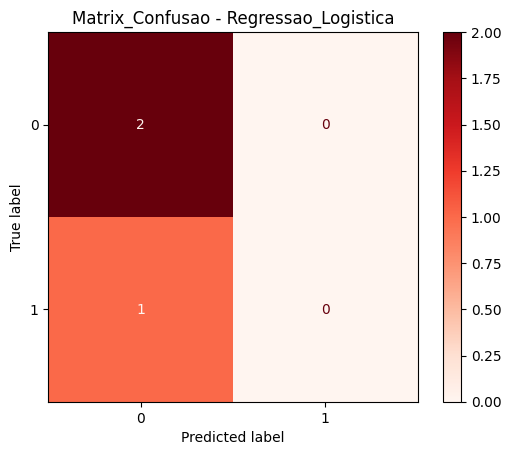

In [99]:
# Fazer a matrix de confusao
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # apresentacao da matriz de confusao
disp.plot(cmap='Reds') # usar a cor vermelha ou outra de preferencia
plt.title('Matrix_Confusao - Regressao_Logistica') # titulo do grafico
plt.show()

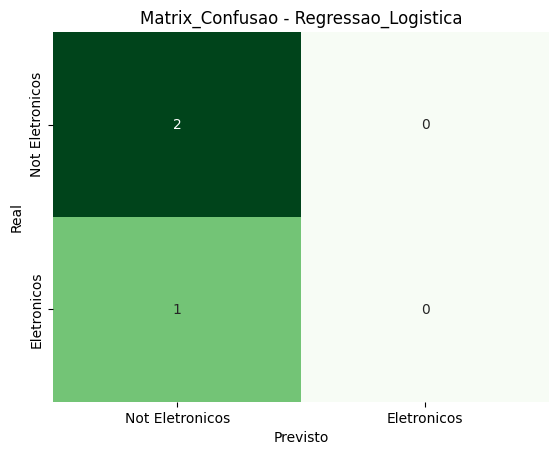

In [101]:
# Matriz de confusao - detalhes
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            cbar=False, xticklabels=['Not Eletronicos', 'Eletronicos'],
            yticklabels=['Not Eletronicos', 'Eletronicos'])
plt.title('Matrix_Confusao - Regressao_Logistica') # titulo do gráfico
plt.xlabel('Previsto') # identificacao o eixo horizontal
plt.ylabel('Real') # identificacao do eixo vertical
plt.show()
